<a href="https://colab.research.google.com/github/Baohikari/Fake-New-Detection/blob/main/Fake_New_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import missingno as mnso
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
fake_df = pd.read_csv('/content/Fake.csv')

In [3]:
true_df = pd.read_csv('/content/True.csv')

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
true_df.shape, fake_df.shape

((21417, 5), (23481, 5))

In [7]:
# Fake news are 0
fake_df['label'] = 0
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
# True news are 1
true_df['label'] = 1
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

In [10]:
combined_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
combined_df.shape

(44898, 5)

<Axes: >

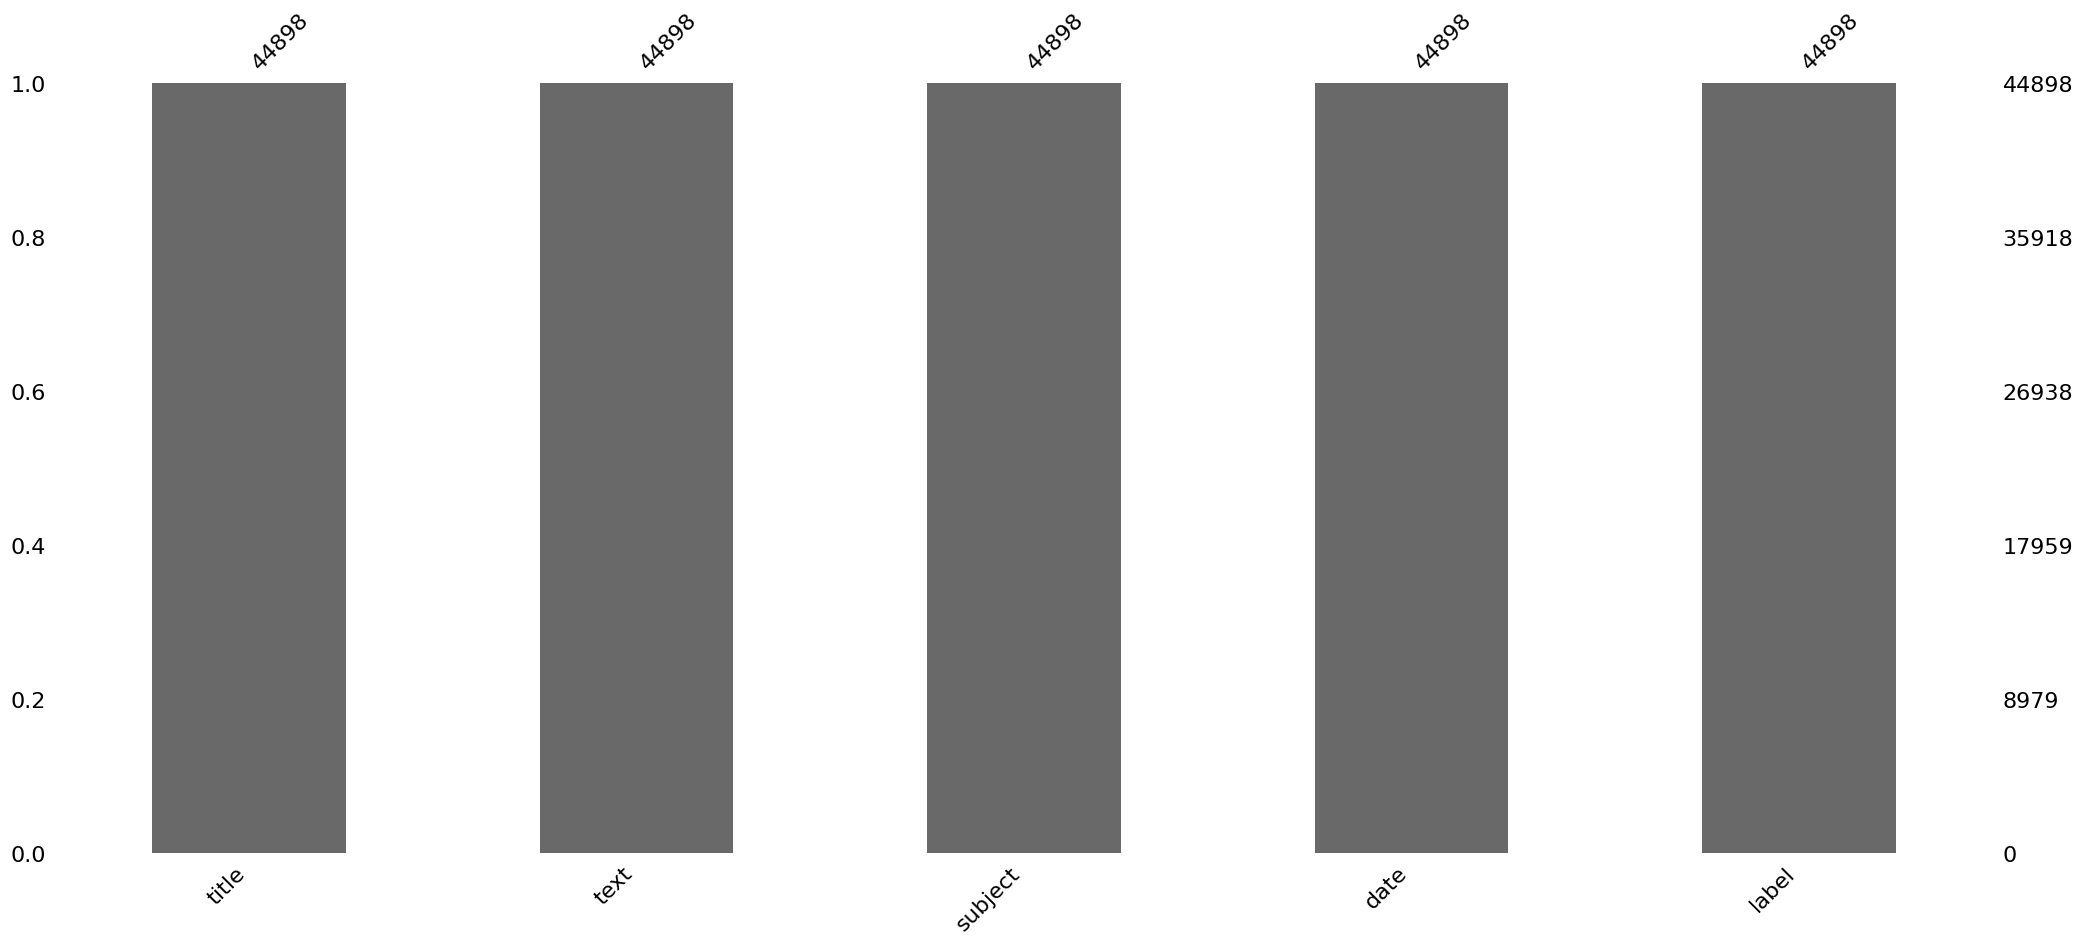

In [15]:
mnso.bar(combined_df)

In [19]:
combined_df['content'] = combined_df['title'] + " " + combined_df['text']

In [18]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)             # Xoá ký tự đặc biệt
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Xoá ký tự đơn
    text = re.sub(r'\s+', ' ', text)            # Xoá nhiều khoảng trắng
    return text.lower()

In [20]:
combined_df['content'] = combined_df['content'].apply(clean_text)

In [21]:
combined_df.head()

,title,text,subject,date,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump sends out embarrassing new year ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,drunk bragging trump staffer started russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,sheriff david clarke becomes an internet joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,trump is so obsessed he even has obama name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis just called out donald trump dur...


In [22]:
#Vectorize using TF-IDF
X = combined_df['content']
y = combined_df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# NAIVE BAYES

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

y_pred = model_nb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred)) #fastest

Accuracy: 0.932293986636971
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4733
           1       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



# SVM with linear kernel

In [29]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

y_pred_svm = model_svm.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.9939866369710467
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [32]:
# SVM with linear kernel takes 6 minutes

# SVM with rbf kernel

In [30]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train_tfidf, y_train)

y_pred_rbf = rbf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy: 0.9947661469933184
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [33]:
#SVM with rbf kernel takes 12 minutes